In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [3]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
# 5110 rows in dataframe, 12 columns
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [6]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 201 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [8]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are seniors 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [9]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Can Smoking Predict Likelyhood of Suffering A Stroke?

Hypothesis for this section: Smoking will have a significant impact on if a stroke is suffered, somewhat if someone has quit smoking, and minimal impact if they have never smoked.

Null Hypothesis for this section: Smoking as no impact on suffering a stroke.

In [25]:
# Breakdown of the smoking status column
 
smoking = stroke_predictive.value_counts("smoking_status")
smoking

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

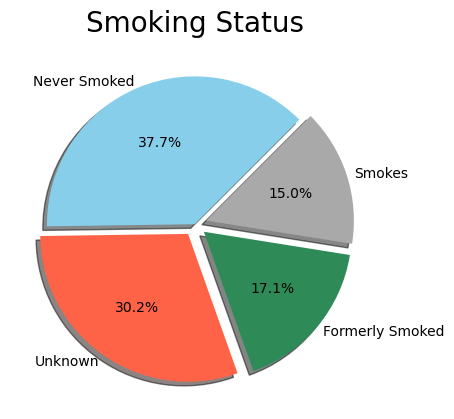

In [14]:
# Pie chart of smoking status counts

labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']
exploded = [0, 0.08, 0.08, 0.08]
plt.title("Smoking Status", fontsize=20, color="k")
plt.pie(smoking, colors=['skyblue', 'tomato', 'seagreen', 'darkgrey'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=1.05)
plt.show()

In [15]:
# Number from each value of smoking status that had a stroke (==1)
# Number from each value of smoking status that did not have a stroke (==0)
# Numbers look similar to first pie chart

smoking_data_had_strokes = stroke_predictive[stroke_predictive["stroke"] == 1]
smoking_data_stroke_counts = smoking_data_had_strokes.value_counts("smoking_status")
smoking_data_had_no_strokes = stroke_predictive[stroke_predictive["stroke"] == 0]
smoking_data_no_stroke_counts = smoking_data_had_no_strokes.value_counts("smoking_status")
smoking_data_stroke_counts, smoking_data_no_stroke_counts

(smoking_status
 never smoked       84
 formerly smoked    57
 smokes             39
 Unknown            29
 Name: count, dtype: int64,
 smoking_status
 never smoked       1768
 Unknown            1454
 formerly smoked     780
 smokes              698
 Name: count, dtype: int64)

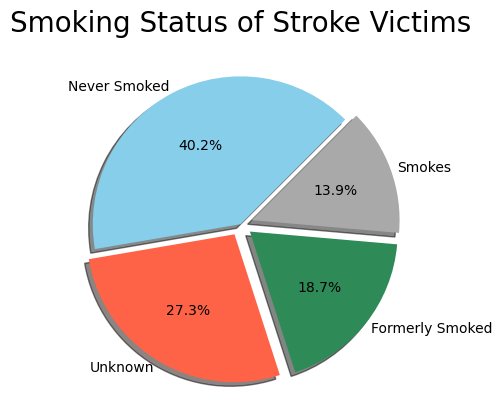

In [16]:
# Followed with a pie chart of only subjects that suffered a stroke.
# Chart looked near identical.
# Need percentages of stroke victims for each smoking catagory.
# This pie chart done entirely with plt.

plt.pie(smoking_data_stroke_counts, colors=['skyblue', 'tomato', 'seagreen', 'darkgrey'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=1.05)
plt.title("Smoking Status of Stroke Victims", fontsize=20, color="k")
plt.show()

In [17]:
# Dropped Unknown as it provided no insight.

smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "smokes"]
smoker_statss = smoker_stats.value_counts("stroke")

former_smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "formerly smoked"]
former_smoker_statss = former_smoker_stats.value_counts("stroke")

never_smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "never smoked"]
never_smoker_statss = never_smoker_stats.value_counts("stroke")

print(smoker_statss, former_smoker_statss, never_smoker_statss)

stroke
0    698
1     39
Name: count, dtype: int64 stroke
0    780
1     57
Name: count, dtype: int64 stroke
0    1768
1      84
Name: count, dtype: int64


In [18]:
# Calculate Anova value for the three groups. 
# pvalue is over 0.05 (0.760) so not staistically significant
# Will plot out bar chart to visually confirm

st.f_oneway(smoker_statss, former_smoker_statss, never_smoker_statss)

F_onewayResult(statistic=0.30101907106657605, pvalue=0.7600802031755473)

In [26]:
# Created new dataframe splitting each catagory into subjects who did and did not suffer strokes.

smoking_df = pd.DataFrame({"smokers": smoker_statss,
                       "former smokers": former_smoker_statss,
                       "never smoked": never_smoker_statss})

smoking_df



,smokers,former smokers,never smoked
stroke,,,
0,698,780,1768
1,39,57,84


Axes(0.125,0.11;0.775x0.77)


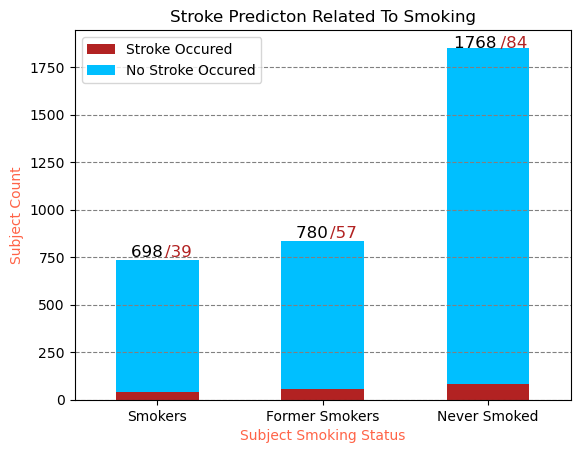

In [45]:
# Bar chart comparing stroke occurances to smoking status
# Manually entered numbers found in step above with only 6 datapoints.

stroke_values = [39, 57, 84]
no_stroke_values = [698, 780, 1768]
index = ['Smokers', 'Former Smokers', 'Never Smoked']
dff = pd.DataFrame({'Stroke Occured': stroke_values,
                    'No Stroke Occured': no_stroke_values}, index=index)
ax = dff.plot.bar(stacked = True, rot=0, title = "Stroke Predicton Related To Smoking", color={"Stroke Occured": "firebrick", "No Stroke Occured": "deepskyblue"})
ax.set_xlabel("Subject Smoking Status", color = "tomato")
ax.set_ylabel("Subject Count", color = "tomato")
plt.grid(linestyle="--", color='gray', axis="y")
plt.text(x=2, y=1850, s='1768     ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=1850, s='          /84',
                 color='firebrick', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=850, s='780    ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=850, s='        /57',
                 color='firebrick', fontsize=12, horizontalalignment='center')
plt.text(x=0, y=750, s='698    ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=0, y=750, s='        /39',
                 color='firebrick', fontsize=12, horizontalalignment='center')
print(ax)

In [28]:
# Calculated the percentage of subjects suffering a stroke for each smoking catagory
# Place into a new dataframe

smokingg_df = pd.DataFrame([smoking_data_stroke_counts / smoking_data_no_stroke_counts])*100
smokingg_df

smoking_status,Unknown,formerly smoked,never smoked,smokes
count,1.994498,7.307692,4.751131,5.587393


Axes(0.125,0.11;0.775x0.77)


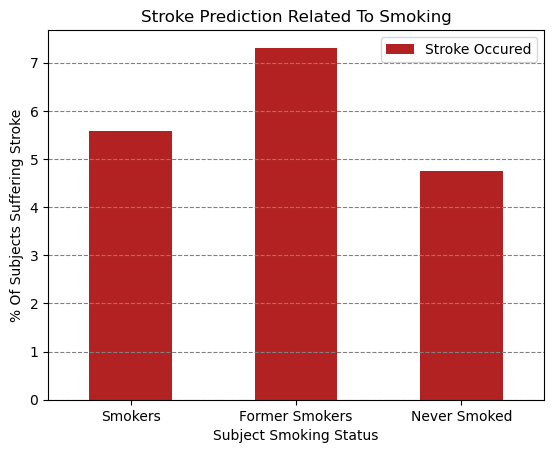

In [29]:
# Bar chart comparing stroke occurance to smoking status
# Manually entered numbers found in step above with only 3 datapoints.

percentage_values = [5.59, 7.31, 4.75]
index = ['Smokers', 'Former Smokers', 'Never Smoked']
dfff = pd.DataFrame({'Stroke Occured': percentage_values}, index=index)
ax = dfff.plot.bar(rot=0, title = "Stroke Prediction Related To Smoking", color="firebrick")
ax.set_xlabel("Subject Smoking Status", color = "k")
ax.set_ylabel("% Of Subjects Suffering Stroke", color = "k")
plt.grid(linestyle="--", color='gray', axis="y")
print(ax)

## Analysis:
Smoking had no impact on likelyhood of suffering a stroke, regardless of currently or formerly smoking. With uneven subject counts for each catagory, as outlined in the first bar chart, a percentage of stroke sufferers was determined and used to calculate a p value.

pvalue=0.7600802031755473

Pvalue being over 0.05, the findings are not statistically significant and we will go with the Null Hypothesis, smoking as no impact on suffering a stroke.

The second bar chart documenting the percentage values displays how close the values are. 